In [166]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [167]:
df = pd.DataFrame()

In [168]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [169]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

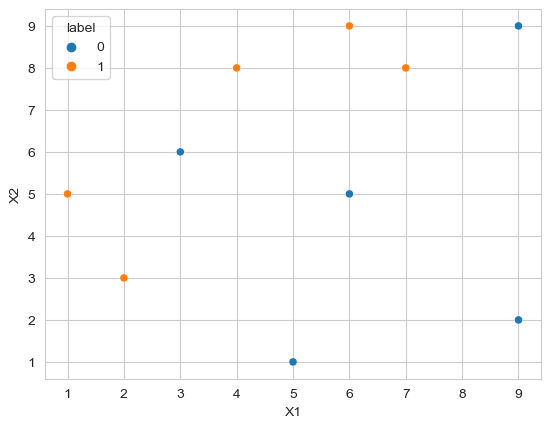

In [170]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [171]:
df['weights'] = 1/df.shape[0]

In [172]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [173]:
from sklearn.tree import DecisionTreeClassifier

In [174]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [175]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [176]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

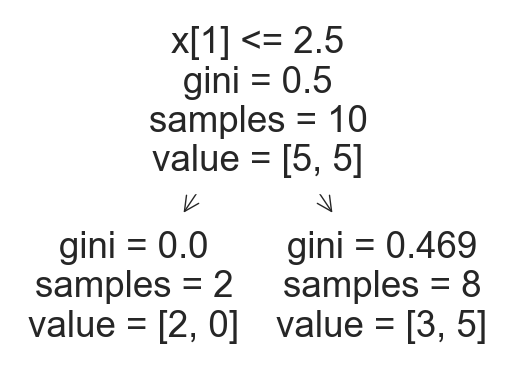

In [177]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

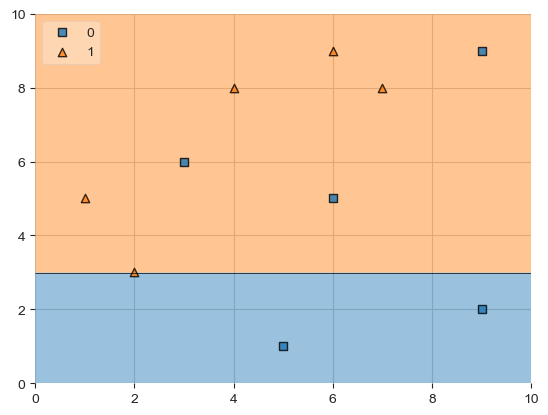

In [178]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [179]:
df['y_pred'] = dt1.predict(X)

In [180]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [181]:
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error+0.0000001))

In [182]:
# Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

0.4236487635269629

In [183]:
# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [184]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [185]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [186]:
df['updated_weights'].sum()

0.9165153319682015

In [187]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [188]:
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [189]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])

In [190]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

In [191]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [192]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [193]:
index_values = create_new_dataset(df)

index_values

[9, 6, 5, 5, 0, 5, 6, 0, 1, 1]

In [194]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [195]:
second_df

,X1,X2,label,weights
9,9,2,0,0.1
6,6,5,0,0.1
5,6,9,1,0.1
5,6,9,1,0.1
0,1,5,1,0.1
5,6,9,1,0.1
6,6,5,0,0.1
0,1,5,1,0.1
1,2,3,1,0.1
1,2,3,1,0.1


In [196]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [197]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [198]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 4.0\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.75, 0.25, 'gini = 0.5\nsamples = 6\nvalue = [3, 3]')]

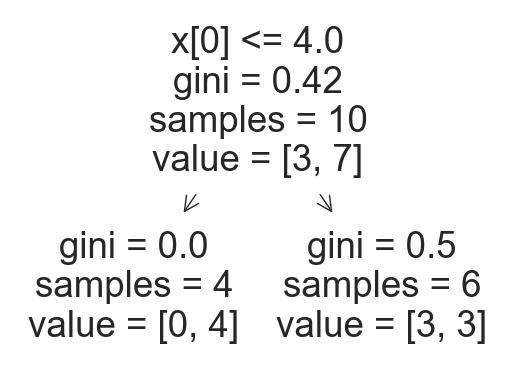

In [199]:
plot_tree(dt2)

<Axes: >

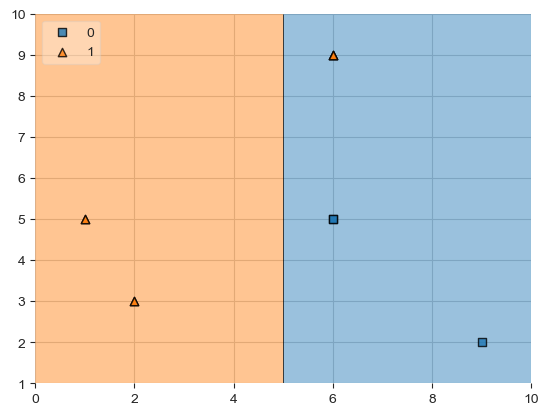

In [200]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [201]:
second_df['y_pred'] = dt2.predict(X)

In [202]:
second_df

,X1,X2,label,weights,y_pred
9,9,2,0,0.1,0
6,6,5,0,0.1,0
5,6,9,1,0.1,0
5,6,9,1,0.1,0
0,1,5,1,0.1,1
5,6,9,1,0.1,0
6,6,5,0,0.1,0
0,1,5,1,0.1,1
1,2,3,1,0.1,1
1,2,3,1,0.1,1


In [203]:
alpha2 = calculate_model_weight(0.3)

In [204]:
alpha2

0.4236487635269629

In [205]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [206]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [207]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
9,9,2,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622
5,6,9,1,0.1,0,0.297427
5,6,9,1,0.1,0,0.297427
0,1,5,1,0.1,1,0.033622
5,6,9,1,0.1,0,0.297427
6,6,5,0,0.1,0,0.033622
0,1,5,1,0.1,1,0.033622
1,2,3,1,0.1,1,0.033622
1,2,3,1,0.1,1,0.033622


In [208]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [209]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
9,9,2,0,0.1,0,0.033622,0.029816
6,6,5,0,0.1,0,0.033622,0.029816
5,6,9,1,0.1,0,0.297427,0.263762
5,6,9,1,0.1,0,0.297427,0.263762
0,1,5,1,0.1,1,0.033622,0.029816
5,6,9,1,0.1,0,0.297427,0.263762
6,6,5,0,0.1,0,0.033622,0.029816
0,1,5,1,0.1,1,0.033622,0.029816
1,2,3,1,0.1,1,0.033622,0.029816
1,2,3,1,0.1,1,0.033622,0.029816


In [210]:
second_df['nomalized_weights'].sum()

1.0

In [211]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [212]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [213]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
9,9,2,0,0.1,0,0.029816,0.000000,0.029816
6,6,5,0,0.1,0,0.029816,0.029816,0.059632
5,6,9,1,0.1,0,0.263762,0.059632,0.323395
5,6,9,1,0.1,0,0.263762,0.323395,0.587157
0,1,5,1,0.1,1,0.029816,0.587157,0.616973
5,6,9,1,0.1,0,0.263762,0.616973,0.880736
6,6,5,0,0.1,0,0.029816,0.880736,0.910552
0,1,5,1,0.1,1,0.029816,0.910552,0.940368
1,2,3,1,0.1,1,0.029816,0.940368,0.970184
1,2,3,1,0.1,1,0.029816,0.970184,1.000000


In [214]:
index_values = create_new_dataset(second_df)

In [215]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [216]:
third_df

,X1,X2,label,weights
6,6,5,0,0.1
5,6,9,1,0.1
5,6,9,1,0.1
9,9,2,0,0.1
5,6,9,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1


In [217]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

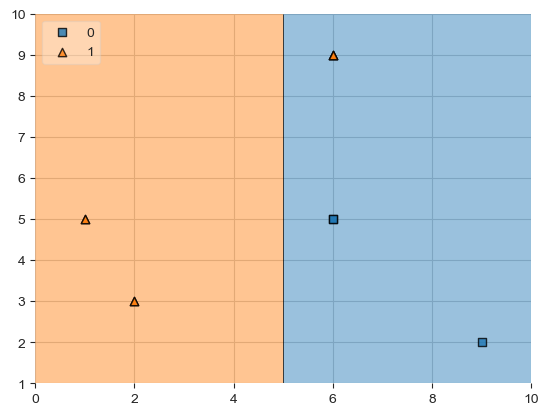

In [218]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [219]:
third_df['y_pred'] = dt3.predict(X)

In [220]:
third_df

,X1,X2,label,weights,y_pred
6,6,5,0,0.1,0
5,6,9,1,0.1,0
5,6,9,1,0.1,0
9,9,2,0,0.1,0
5,6,9,1,0.1,1
5,6,9,1,0.1,0
5,6,9,1,0.1,0
5,6,9,1,0.1,1
5,6,9,1,0.1,1
5,6,9,1,0.1,1


In [221]:
alpha3 = calculate_model_weight(0.4)
alpha3

0.20273242905409775

In [222]:
print(alpha1,alpha2,alpha3)

0.4236487635269629 0.4236487635269629 0.20273242905409775


# Prediction

In [223]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [224]:
dt2.predict(query)

array([1], dtype=int64)

In [225]:
dt3.predict(query)

array([1], dtype=int64)

In [226]:
alpha1*1 + alpha2*(1) + alpha3*(1)

1.0500299561080235

In [227]:
np.sign(1.09)

1.0

In [228]:
query = np.array([9, 9]).reshape(1, 2)
dt1.predict(query)

array([1], dtype=int64)

In [229]:
dt2.predict(query)

array([0], dtype=int64)

In [230]:
dt3.predict(query)

array([0], dtype=int64)

In [231]:
alpha1 * (1) + alpha2 * (-1) + alpha3 * (-1)

-0.20273242905409775

In [232]:
np.sign(-0.25)

-1.0